In [28]:
import matplotlib.pyplot as plt
from wremnants.datasets.datagroups import datagroups2016
from wremnants import boostHistHelpers as hh
from wremnants import plot_tools,syst_tools
from wremnants import histselections as sel
import lz4.frame
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

In [35]:
with lz4.frame.open("../wremnants/data/angularCoefficients/w_coeffs.pkl.lz4") as f:
    coeffs = pickle.load(f)

In [36]:
coeffs

Hist(
  Variable([0, inf], name='massVgen', label='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 10], name='absYVgen', label='absYVgen'),
  Variable([0, 2, 3, 4, 4.75, 5.5, 6.5, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], name='ptVgen', label='ptVgen'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Integer(-1, 8, underflow=False, overflow=False, name='helicity', label='helicity'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muRfact', label='muRfact'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muFfact', label='muFfact'),
  storage=Weight()) # Sum: WeightedSum(value=2949.97, variance=97937.9) (WeightedSum(value=3817.01, variance=103864) with flow)

Text(0.5, 1.0, 'A$_0$ fraction')

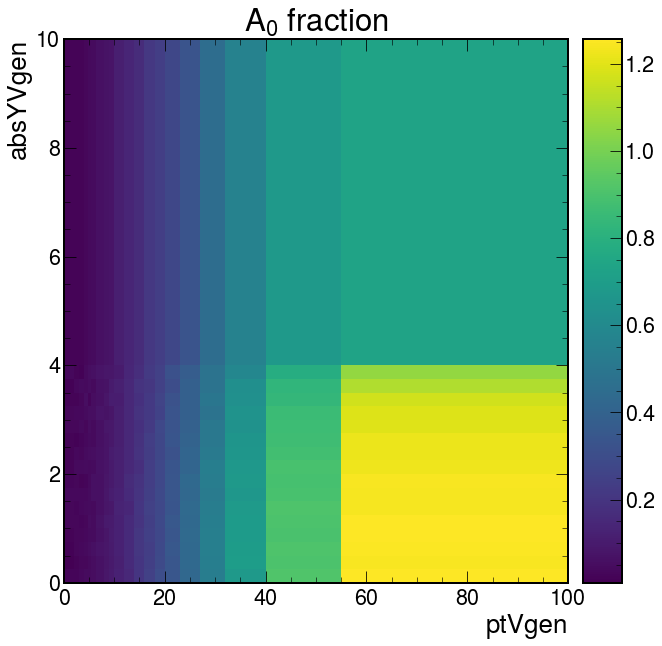

In [48]:
coeff = 1
coeffs[{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : 1}].project("ptVgen", "absYVgen").plot()
plt.title(f"A$_{coeff-1}$ fraction" if coeff != 0 else "Const. term")